In [1]:
import pandas as pd 
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
import imagehash

In [2]:
train = pd.read_csv("../data/train.csv")

In [3]:
train.id_code.nunique()

3662

In [4]:
base_image_dir = os.path.join('..', 'data/') # Joining the base directory Input
train_dir = os.path.join(base_image_dir,'train_images/') # Training Directory Location
df = pd.read_csv(os.path.join(base_image_dir, 'train.csv')) # Reading the training file
#train_dir = os.path.join(base_image_dir,'test_images/') # Training Directory Location
#df = pd.read_csv(os.path.join(base_image_dir, 'test.csv')) # Reading the training file
df['path'] = df['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x))) # Getting the path of the image
df = df.drop(columns=['id_code']) # Dropping the Id code column
df = df.sample(frac=1).reset_index(drop=True) 
df.head(10) # Getting the top 10 records

,diagnosis,path
0,2,../data/train_images/5e7630f8438e.png
1,2,../data/train_images/5152bf091152.png
2,0,../data/train_images/4bcee3cbe232.png
3,0,../data/train_images/94145d1f42cf.png
4,0,../data/train_images/05b1bb2bdb81.png
5,0,../data/train_images/8e76054f0831.png
6,0,../data/train_images/5d4e5fd34d91.png
7,0,../data/train_images/8693ab1fd2be.png
8,2,../data/train_images/e265c870f9b3.png
9,2,../data/train_images/929cd3867815.png


Calculating the Hash, Shape, Mode, Length and Ratio of each image

In [5]:
def getImageMetaData(file_path):
    with Image.open(file_path) as img:
        img_hash = imagehash.phash(img)
        return img.size, img.mode, img_hash

def get_train_input():
    train_input = df.copy()
        
    m = train_input.path.apply(lambda x: getImageMetaData(x))
    train_input["Hash"] = [str(i[2]) for i in m]
    train_input["Shape"] = [i[0] for i in m]
    train_input["Mode"] = [str(i[1]) for i in m]
    train_input["Length"] = train_input["Shape"].apply(lambda x: x[0]*x[1])
    train_input["Ratio"] = train_input["Shape"].apply(lambda x: x[0]/x[1])
    
    
    img_counts = train_input.path.value_counts().to_dict()
    train_input["Id_Count"] = train_input.path.apply(lambda x: img_counts[x])
    return train_input

train_input = get_train_input()


In [6]:
train_input.head()

,diagnosis,path,Hash,Shape,Mode,Length,Ratio,Id_Count
0,2,../data/train_images/5e7630f8438e.png,85955f651e961e49,"(3216, 2136)",RGB,6869376,1.505618,1
1,2,../data/train_images/5152bf091152.png,85b15f813ea55a47,"(3216, 2136)",RGB,6869376,1.505618,1
2,0,../data/train_images/4bcee3cbe232.png,95964bc93a366e49,"(1050, 1050)",RGB,1102500,1.000000,1
3,0,../data/train_images/94145d1f42cf.png,c3663e9a78593073,"(2048, 1536)",RGB,3145728,1.333333,1
4,0,../data/train_images/05b1bb2bdb81.png,c53811e712679f78,"(2588, 1958)",RGB,5067304,1.321757,1


In [7]:
train_input1 = train_input[['Hash']] # Getting the Hash from the new data

In [8]:
train_input1['New']=1 # Creating a dummy column 1

/home/ags/miniconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
train_input1.head()

,Hash,New
0,85955f651e961e49,1
1,85b15f813ea55a47,1
2,95964bc93a366e49,1
3,c3663e9a78593073,1
4,c53811e712679f78,1


In [10]:
train_input1.shape

(3662, 2)

In [11]:
train_input2 = train_input1.groupby('Hash').count().reset_index() # Grouping the column by Hash to aggregate at Hash level

In [12]:
train_input2.shape

(3508, 2)

In [13]:
train_input2.head()

,Hash,New
0,800d07f01f1f7fe4,1
1,803d453317cd4fb3,1
2,803f15f4709e1ff0,1
3,803f1fe2609f1ee1,1
4,803f4df272cc1f32,1


In [14]:
train_input2.New.value_counts()

1    3364
2     135
3       8
4       1
Name: New, dtype: int64

In [15]:
train_input2 = train_input2[train_input2['New']>1] # Filtering those instances where the hash is occuring multiple timeskk

In [16]:
train_input2.shape # Checking the shape

(144, 2)

In [17]:
train_input2.head()

,Hash,New
20,808d0f3513f33f2d,2
21,808d17355ee51fa5,2
24,808d17715f871ff0,2
42,809d1575571f1ee1,2
56,80ad17e10fb51f17,2


In [21]:
train_input2 = train_input2.sort_values('Hash') # Sorting the data by Hash 

In [22]:
train_input2.head(5) # Checking the top 5 records

,Hash,New
20,808d0f3513f33f2d,2
21,808d17355ee51fa5,2
24,808d17715f871ff0,2
42,809d1575571f1ee1,2
56,80ad17e10fb51f17,2


In [23]:
train_input[train_input['Hash']=='808d0f3513f33f2d'] # FIltering only one Hash from master data

,diagnosis,path,Hash,Shape,Mode,Length,Ratio,Id_Count
904,2,../data/train_images/1632c4311fc9.png,808d0f3513f33f2d,"(2416, 1736)",RGB,4194176,1.391705,1
1701,1,../data/train_images/a75bab2463d4.png,808d0f3513f33f2d,"(2416, 1736)",RGB,4194176,1.391705,1


In [40]:
train_input.head()



,diagnosis,path,Hash,Shape,Mode,Length,Ratio,Id_Count
0,2,../data/train_images/5e7630f8438e.png,85955f651e961e49,"(3216, 2136)",RGB,6869376,1.505618,1
1,2,../data/train_images/5152bf091152.png,85b15f813ea55a47,"(3216, 2136)",RGB,6869376,1.505618,1
2,0,../data/train_images/4bcee3cbe232.png,95964bc93a366e49,"(1050, 1050)",RGB,1102500,1.000000,1
3,0,../data/train_images/94145d1f42cf.png,c3663e9a78593073,"(2048, 1536)",RGB,3145728,1.333333,1
4,0,../data/train_images/05b1bb2bdb81.png,c53811e712679f78,"(2588, 1958)",RGB,5067304,1.321757,1


### duplicates ids in train.csv

In [29]:
duplicates = []
for hash_code in train_input2.Hash.values:
    dups = train_input[train_input["Hash"] == hash_code]["path"].values # get the duplicates file paths
    duplicates.append([x.split('/')[-1].split('.')[0] for x in dups]) # extract id_code from path 

In [30]:
duplicates

[['1632c4311fc9', 'a75bab2463d4'],
 ['64678182d8a8', '6b00cb764237'],
 ['f0098e9d4aee', '8273fdb4405e'],
 ['d801c0a66738', '68332fdcaa70'],
 ['ba735b286d62', 'ed3a0fc5b546'],
 ['7bf981d9c7fe', '36677b70b1ef'],
 ['19722bff5a09', '19e350c7c83c'],
 ['435d900fa7b2', '1006345f70b7'],
 ['278aa860dffd', 'f066db7a2efe'],
 ['36041171f441', '595446774178'],
 ['f4d3777f2710', '5dc23e440de3'],
 ['6e92b1c5ac8e', '9c52b87d01f1'],
 ['8fc09fecd22f', 'd1cad012a254'],
 ['906d02fb822d', 'a4012932e18d'],
 ['89ee1fa16f90', '4478b870e549'],
 ['33105f9b3a04', '111898ab463d'],
 ['86baef833ae0', '7a0cff4c24b2'],
 ['8446826853d0', '8ef2eb8c51c4'],
 ['7877be80901c', 'ee2c2a5f7d0e'],
 ['f9e1c439d4c8', '3f44d749cd0b'],
 ['a8582e346df0', '7a3ea1779b13', 'c027e5482e8c', 'ca6842bfcbc9'],
 ['9a3c03a5ad0f', 'f03d3c4ce7fb'],
 ['1a1b4b2450ca', '92b0d27fc0ec'],
 ['2df07eb5779f', 'b91ef82e723a'],
 ['c68dfa021d62', '4ce74e5eb51d'],
 ['3c53198519f7', '1c5e6cdc7ee1'],
 ['c0e509786f7f', 'aeed1f251ceb'],
 ['1ae8c165fd53', '5a36

In [31]:
np.save('../data/duplicates.npy', duplicates)

#### get the hashes of those which have conflicting diagnosises

In [32]:
bad_ones = [] # those duplicates which have conflicting diagnosis categories, gotta remove them from training
for hash_code in train_input2.Hash.values:
    diagnosises = train_input[train_input["Hash"] == hash_code]['diagnosis'].value_counts()
    if diagnosises.shape[0] > 1:
        bad_ones.append(hash_code)
        
print('Total bad ones:', len(bad_ones))

Total bad ones: 37


##### get the id_code's of those which don't have conflicting diagnosises, we can include them in train set/ not val set

In [62]:
duplicates = []
for hash_code in train_input2.Hash.values:
    if hash_code not in bad_ones:
        dups = train_input[train_input["Hash"] == hash_code]["path"].values # get the duplicates file paths
        duplicates.extend([x.split('/')[-1].split('.')[0] for x in dups]) # extract id_code from path 

In [63]:
duplicates

['64678182d8a8',
 '6b00cb764237',
 'd801c0a66738',
 '68332fdcaa70',
 'ba735b286d62',
 'ed3a0fc5b546',
 '7bf981d9c7fe',
 '36677b70b1ef',
 '19722bff5a09',
 '19e350c7c83c',
 '435d900fa7b2',
 '1006345f70b7',
 '36041171f441',
 '595446774178',
 'f4d3777f2710',
 '5dc23e440de3',
 '6e92b1c5ac8e',
 '9c52b87d01f1',
 '8fc09fecd22f',
 'd1cad012a254',
 '906d02fb822d',
 'a4012932e18d',
 '89ee1fa16f90',
 '4478b870e549',
 '33105f9b3a04',
 '111898ab463d',
 '86baef833ae0',
 '7a0cff4c24b2',
 '7877be80901c',
 'ee2c2a5f7d0e',
 'f9e1c439d4c8',
 '3f44d749cd0b',
 'a8582e346df0',
 '7a3ea1779b13',
 'c027e5482e8c',
 'ca6842bfcbc9',
 '1a1b4b2450ca',
 '92b0d27fc0ec',
 'c68dfa021d62',
 '4ce74e5eb51d',
 '3c53198519f7',
 '1c5e6cdc7ee1',
 'c0e509786f7f',
 'aeed1f251ceb',
 '1ae8c165fd53',
 '5a36cea278ae',
 '7e160c8b611e',
 '91b6ebaa3678',
 'd994203deb64',
 'a505981d1cab',
 '7d261f986bef',
 '91cbe1c775ef',
 '29f44aea93a4',
 '7e6e90a93aa5',
 '7b691d9ced34',
 'd51c2153d151',
 'c05b7b4c22fe',
 'aca88f566228',
 '878a3a097436

In [65]:
dup_train_input = train[train["id_code"].apply(lambda x: True if x in duplicates else False)] # from Hash to original df

In [66]:
dup_train_input.head()

,id_code,diagnosis
9,00cb6555d108,1
16,012a242ac6ff,2
19,0161338f53cc,2
35,026dcd9af143,2
43,034cb07a550f,4


In [48]:
dup_train_input.shape

(219, 2)

In [49]:
np.save('../data/dups_with_same_diagnosis.npy', dup_train_input.index)

In [71]:
train.iloc[dup_train_input.index]

,id_code,diagnosis
9,00cb6555d108,1
16,012a242ac6ff,2
19,0161338f53cc,2
35,026dcd9af143,2
43,034cb07a550f,4
59,04ac765f91a1,1
72,05a5183c92d0,1
90,07419eddd6be,2
138,0a4e1a29ffff,0
164,0c7e82daf5a0,2


##### let's get the indices of the bad duplicates

In [25]:
train_input.head()

,diagnosis,path,Hash,Shape,Mode,Length,Ratio,Id_Count
0,2,../data/train_images/5e7630f8438e.png,85955f651e961e49,"(3216, 2136)",RGB,6869376,1.505618,1
1,2,../data/train_images/5152bf091152.png,85b15f813ea55a47,"(3216, 2136)",RGB,6869376,1.505618,1
2,0,../data/train_images/4bcee3cbe232.png,95964bc93a366e49,"(1050, 1050)",RGB,1102500,1.000000,1
3,0,../data/train_images/94145d1f42cf.png,c3663e9a78593073,"(2048, 1536)",RGB,3145728,1.333333,1
4,0,../data/train_images/05b1bb2bdb81.png,c53811e712679f78,"(2588, 1958)",RGB,5067304,1.321757,1


In [133]:
bad_train_input = train_input[train_input["Hash"].apply(lambda x: True if x in bad_ones else False)] # from Hash to original df

In [134]:
bad_train_input.head()


,diagnosis,path,Hash,Shape,Mode,Length,Ratio,Id_Count
93,4,../data/train_images/0243404e8a00.png,c03f5fe01b1f60e1,"(2588, 1958)",RGB,5067304,1.321757,1
125,3,../data/train_images/8688f3d0fcaf.png,c5cc1a2d4fc7383c,"(1050, 1050)",RGB,1102500,1.000000,1
204,0,../data/train_images/1c9c583c10bf.png,95994335174b4bb5,"(2416, 1736)",RGB,4194176,1.391705,1
235,2,../data/train_images/5eb311bcb5f9.png,c1c11e165be36b1e,"(1504, 1000)",RGB,1504000,1.504000,1
237,3,../data/train_images/4d9fc85a8259.png,859d57710f255a4b,"(2416, 1736)",RGB,4194176,1.391705,1


In [137]:
bad_train_input.index

Int64Index([  93,  125,  204,  235,  237,  248,  333,  365,  369,  493,  536,
             538,  626,  745,  788,  812,  822,  896,  919,  927,  944,  952,
            1060, 1103, 1133, 1160, 1171, 1215, 1233, 1237, 1364, 1372, 1420,
            1475, 1493, 1613, 1695, 1744, 1766, 1788, 1807, 1870, 1957, 2041,
            2058, 2091, 2137, 2274, 2343, 2345, 2413, 2494, 2522, 2565, 2601,
            2618, 2619, 2637, 2661, 2699, 2752, 2786, 2806, 2831, 2870, 2874,
            2884, 3036, 3070, 3076, 3162, 3163, 3295, 3339, 3404, 3482, 3533,
            3542, 3647],
           dtype='int64')

In [138]:
df = pd.read_csv('../data/train.csv')

In [145]:
bad_indices = bad_train_input.index 

In [146]:
np.save('../data/bad_train_indices.npy', bad_indices)

#np.save('../data/duplicate_test_ids.npy', train_input2.Hash.values)

In [117]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [120]:
bad_ones

array(['808d0f3513f33f2d', '808d17715f871ff0', '8181171d1fe15f9d',
       '85685fa13eb45a63', '85855ed62ead5a52', '85911f854eb53ac7',
       '859511634fcd3b35', '85951f4f1e933a25', '859557750fa44e65',
       '85955fa53e924a87', '85991e676e1c38c7', '859d57710f255a4b',
       '85d053250f7e5aad', '909547851e354fed', '91e16e853a932ccf',
       '94854b932f063fcb', '94c14b853e9d6b63', '955a41a5567a36ab',
       '95994335174b4bb5', '95c04ba50fcb3aa7', '95e153a50fa55a56',
       '969a6b60246f3967', 'c03f5fe01b1f60e1', 'c08d172d5ff01e0f',
       'c09d17701b1f1fe1', 'c09f17f00ff01f07', 'c0c11f171ff06397',
       'c0c41f655a872fa7', 'c1851fc45b833f87', 'c1c11e165be36b1e',
       'c1c51f075af03f07', 'c59c1e617a1e3ac3', 'c5c51b841f336ace',
       'c5c53a1c1ac7679c', 'c5cc1a2d4fc7383c', 'c6863b996e466939',
       'd0844b493f9e7c6a'], dtype='<U16')

In [128]:
df[df.id_code.apply(lambda x: print(x))]

000c1434d8d7
001639a390f0
0024cdab0c1e
002c21358ce6
005b95c28852
0083ee8054ee
0097f532ac9f
00a8624548a9
00b74780d31d
00cb6555d108
00cc2b75cddd
00e4ddff966a
00f6c1be5a33
0104b032c141
0124dffecf29
0125fbd2e791
012a242ac6ff
014508ccb9cb
0151781fe50b
0161338f53cc
0180bfa26c0b
0182152c50de
01b3aed3ed4c
01c7808d901d
01d9477b1171
01eb826f6467
01f7bb8be950
0212dd31f623
022f820027b8
0231642cf1c2
0232dfea7547
02358b47ea89
0243404e8a00
025a169a0bb0
02685f13cefd
026dcd9af143
02cd34a85b24
02da652c74b8
02dda30d3acf
0304bedad8fe
0318598cfd16
032d7b0b4bf6
033f2b43de6d
034cb07a550f
03676c71ed1b
0369f3efe69b
03747397839f
03a7f4a5786f
03b373718013
03c85870824c
03e25101e8e8
03fd50da928d
03ff7d159f10
0415fc68b176
041f09eec1e8
0423237770a7
042470a92154
04579e31e4be
04a6fc58dabc
04ac765f91a1
04aef84a2cc1
04d029cfb612
04efb1a284cc
050bb1eafa76
05113073b268
05195a3db5e2
0519b934f6b1
052d9a3fe55a
05339950962e
054b1b305160
0551676cc2aa
059bc89df7f4
05a5183c92d0
05b1bb2bdb81
05cd0178ccfe
05e9126dfa5c
06024377d573

ValueError: cannot index with vector containing NA / NaN values

In [121]:
df.drop(

ValueError: Lengths must match to compare

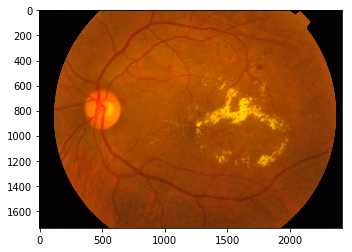

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time

%matplotlib inline

PATH = "../input/train_images/1632c4311fc9.png"
image = mpimg.imread(PATH) # images are color images
plt.imshow(image);

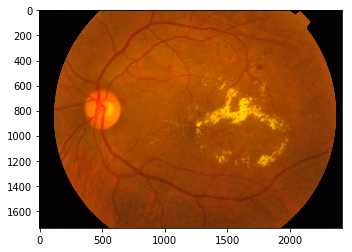

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time

%matplotlib inline

PATH = "../input/train_images/a75bab2463d4.png"
image = mpimg.imread(PATH) # images are color images
plt.imshow(image);